In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=56f1227ed695da766bdb7f291e15f609a724ffac47b3462ff023405cff116525
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [3]:
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

Gen RAM Free: 12.8 GB  | Proc size: 111.5 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [2]:
!pip install pyLDAvis
!pip install nltk
!pip install -U gensim

     |████████████████████████████████| 1.6MB 3.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=87338e5077b63d7ba04198b3376dc201a6191ed7bb4bd12ab116dda59fc7072e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
     |████████████████████████████████| 24.2MB 1.6MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
#Import libraries
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
from spacy import displacy

import pickle 

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
df = pd.read_csv('/content/drive/My Drive/arXiv/selected_papers.csv')
df['abstract'] = df['abstract'].str.strip()
# Convert to list
data = df.abstract.values.tolist()

In [ ]:
data[0]

"Message passing algorithms have proved surprisingly successful in solving hard constraint satisfaction problems on sparse random graphs. In such applications, variables are fixed sequentially to satisfy the constraints. Message passing is run after each step. Its outcome provides an heuristic to make choices at next step. This approach has been referred to as `decimation,' with reference to analogous procedures in statistical physics.   The behavior of decimation procedures is poorly understood. Here we consider a simple randomized decimation algorithm based on belief propagation (BP), and analyze its behavior on random k-satisfiability formulae. In particular, we propose a tree model for its analysis and we conjecture that it provides asymptotically exact predictions in the limit of large instances. This conjecture is confirmed by numerical simulations."

In [ ]:
nlp = spacy.load('en_core_web_sm')
sentence = nlp(data[15].split(".")[2])
displacy.render(sentence, style='dep', jupyter=True)

In [ ]:
for token in sentence:
  print('%r (%s)' % (str(token), token.pos_), end='')

' ' (SPACE)'In' (ADP)'contrast' (NOUN)'with' (ADP)'traditional' (ADJ)'gradient' (NOUN)'-' (PUNCT)'based' (VERB)'approaches' (NOUN)'that' (DET)'conduct' (VERB)'optimization' (NOUN)'on' (ADP)'all' (DET)'input' (NOUN)'features' (NOUN)',' (PUNCT)'the' (DET)'proposed' (VERB)'method' (NOUN)'iteratively' (ADV)'activates' (VERB)'a' (DET)'group' (NOUN)'of' (ADP)'features' (NOUN)'and' (CCONJ)'solves' (VERB)'a' (DET)'sequence' (NOUN)'of' (ADP)'multiple' (ADJ)'kernel' (NOUN)'learning' (NOUN)'(' (PUNCT)'MKL' (PROPN)')' (PUNCT)'subproblems' (NOUN)'of' (ADP)'much' (ADV)'reduced' (VERB)'scale' (NOUN)

In [ ]:
for token in sentence:
  print('{} : {}'.format(token.dep_ , spacy.explain(token.dep_)))

 : None
prep : prepositional modifier
pobj : object of preposition
prep : prepositional modifier
amod : adjectival modifier
npadvmod : noun phrase as adverbial modifier
punct : punctuation
amod : adjectival modifier
pobj : object of preposition
nsubj : nominal subject
relcl : relative clause modifier
dobj : direct object
prep : prepositional modifier
det : determiner
compound : compound
pobj : object of preposition
punct : punctuation
det : determiner
amod : adjectival modifier
nsubj : nominal subject
advmod : adverbial modifier
ROOT : None
det : determiner
dobj : direct object
prep : prepositional modifier
pobj : object of preposition
cc : coordinating conjunction
conj : conjunct
det : determiner
dobj : direct object
prep : prepositional modifier
amod : adjectival modifier
compound : compound
pobj : object of preposition
punct : punctuation
nmod : modifier of nominal
punct : punctuation
ROOT : None
prep : prepositional modifier
amod : adjectival modifier
amod : adjectival modifier
pob

In [ ]:
for chunk in conference_doc.noun_chunks:
    print (chunk)

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# Extract Noun Phrases
transformed_sentence = ""
for chunk in sentence.noun_chunks:
  transformed_sentence += str(chunk) + " "
  print(str(chunk))

contrast
traditional gradient-based approaches
optimization
all input features
the proposed method
a group
features
a sequence
multiple kernel learning
(MKL) subproblems
much reduced scale


In [ ]:
transformed_sentence

'contrast traditional gradient-based approaches optimization all input features the proposed method a group features a sequence multiple kernel learning (MKL) subproblems much reduced scale '

In [ ]:

sentence = nlp(transformed_sentence)
displacy.render(sentence, style='dep', jupyter=True)


In [ ]:
%%time
def extract_noun_phrases(text):
    return [chunk.text for chunk in nlp(text).noun_chunks]

def add_noun_phrases(df):
    df['noun_phrases'] = df['abstract'].apply(extract_noun_phrases)

add_noun_phrases(df)

CPU times: user 1h 24min 52s, sys: 7.33 s, total: 1h 24min 59s
Wall time: 1h 25min 5s


In [ ]:
#df.to_csv('/content/drive/My Drive/arXiv/papers_noun_phrases.csv', index=False)

In [4]:
df = pd.read_csv('/content/drive/My Drive/arXiv/papers_noun_phrases.csv')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# NLTK Stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
gensim.__version__

'3.8.3'

In [8]:
data = df.noun_phrases.to_list()

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [11]:
%%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

bigram_phraser = gensim.models.phrases.Phraser(bigram)
trigram_phraser = gensim.models.phrases.Phraser(trigram)

CPU times: user 1min 28s, sys: 492 ms, total: 1min 28s
Wall time: 1min 29s


In [12]:
start = 0
for trigram in trigram_phraser.phrasegrams.keys():
    print(trigram)
    start += 1
    if start == 10:
      break 

(b'constraint', b'satisfaction')
(b'belief', b'propagation')
(b'belief_propagation', b'bp')
(b'copula', b'entropy')
(b'special', b'case')
(b'aesthetically', b'pleasing')
(b'randomly', b'generated')
(b'partial', b'observability')
(b'partial', b'observability_the')
(b'partially', b'observable')


In [13]:
start = 0
for bigram in bigram_phraser.phrasegrams.keys():
    print(bigram)
    start += 1
    if start == 10:
      break 

(b'constraint', b'satisfaction')
(b'belief', b'propagation')
(b'propagation', b'bp')
(b'copula', b'entropy')
(b'aesthetically', b'pleasing')
(b'randomly', b'generated')
(b'partial', b'observability')
(b'partially', b'observable')
(b'observable', b'markov')
(b'markov', b'decision')


In [14]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_phraser[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_phraser[bigram_phraser[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
%%time
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_trigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams)

CPU times: user 6min 19s, sys: 1.94 s, total: 6min 21s
Wall time: 6min 22s


In [16]:
# using bag of words approach

In [17]:
%%time
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1)]]
CPU times: user 9.07 s, sys: 234 ms, total: 9.31 s
Wall time: 9.34 s


In [ ]:
%%time
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


CPU times: user 17min 8s, sys: 2.76 s, total: 17min 11s
Wall time: 17min 12s


In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"model" + 0.045*"method" + 0.041*"network" + 0.029*"task" + '
  '0.027*"approach" + 0.026*"performance" + 0.025*"result" + 0.024*"learn" + '
  '0.023*"dataset" + 0.022*"deep"'),
 (1,
  '0.199*"graph" + 0.107*"text" + 0.075*"embed" + 0.071*"question" + '
  '0.057*"relation" + 0.052*"brain" + 0.038*"variation" + 0.029*"answer" + '
  '0.025*"link" + 0.021*"regret"'),
 (2,
  '0.327*"class" + 0.292*"loss" + 0.061*"gap" + 0.046*"population" + '
  '0.038*"testing" + 0.027*"norm" + 0.025*"basic" + 0.021*"protocol" + '
  '0.019*"modification" + 0.016*"fit"'),
 (3,
  '0.082*"state" + 0.077*"agent" + 0.066*"policy" + 0.059*"environment" + '
  '0.053*"current" + 0.049*"control" + 0.048*"behavior" + '
  '0.038*"reinforcement" + 0.036*"goal" + 0.030*"game"'),
 (4,
  '0.202*"image" + 0.126*"feature" + 0.064*"detection" + 0.059*"object" + '
  '0.041*"segmentation" + 0.039*"train" + 0.036*"semantic" + 0.033*"visual" + '
  '0.026*"map" + 0.026*"region"'),
 (5,
  '0.089*"cluster" + 0.082*"c

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.987356946695268

Coherence Score:  0.35387299044323206


In [18]:
%%time
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=156,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [18]:
len(corpus)

61425

In [ ]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=20, limit=51, step=5)

CPU times: user 3h 19min 14s, sys: 35.1 s, total: 3h 19min 49s
Wall time: 3h 20min 4s


In [ ]:

with open('/content/drive/My Drive/arXiv/coherence_values.pickle', 'wb') as f:
  pickle.dump(coherence_values, f)

In [ ]:

with open('/content/drive/My Drive/arXiv/models.pickle', 'wb') as f:
  pickle.dump(model_list, f)


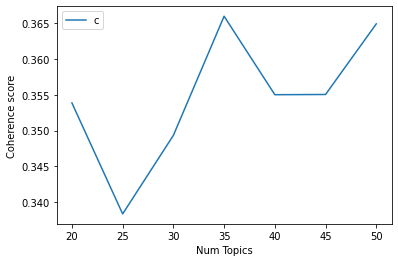

In [ ]:
## Plot the coherence scores for different N topics
### Select optimum N

# Show graph
limit=51; start=20; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
%%time
# Can take a long time to run.
model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=50, limit=301, step=50)

import pickle 

with open('/content/drive/My Drive/arXiv/models2.pickle', 'wb') as f:
  pickle.dump(model_list2, f)


with open('/content/drive/My Drive/arXiv/coherence_values2.pickle', 'wb') as f:
  pickle.dump(coherence_values2, f)



In [ ]:
coherence_values2

In [ ]:
limit=301; start=50; step=50;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
limit=300; start=100; step=50;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [1]:
coherence_values2

NameError: ignored

In [3]:
corpus

NameError: ignored